## Load in packages and modified FROMAGe

In [1]:
%cd ../..

/home/nils/NILS/Master/DL2/DL2-ZeroVis


In [2]:
from src.fromage_inf.inf_utils import PromptParser
import pickle
import torch
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
parser = PromptParser("src/fromage_inf/fromage_model/")

# Load the relations dictionary to make the relations.
relations_dict = pickle.load(open("src/code/relations_dict.pkl", "rb"))

Using facebook/opt-6.7b for the language model.
Freezing the LM.
Initializing embedding for the retrieval token [RET] (id = 50266).


In [4]:
model = parser.model
relations = model.visual_embs

# T-SNE

In [5]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
X = None
y = []

for key, emb in model.visual_embs.items():
    if type(X) == torch.Tensor:
        X = torch.vstack((X, emb))
    else:
        X = emb
    y.append(key.split('/')[0])

X = torch.tensor(X, dtype=torch.float16)
X = torch.squeeze(X)
X = X.detach().cpu().numpy()

X.shape

/tmp/ipykernel_10126/1377773417.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float16)


(74, 4096)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 74 / 74
[t-SNE] Mean sigma: 39.526697
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.223012
[t-SNE] KL divergence after 275 iterations: 0.235240


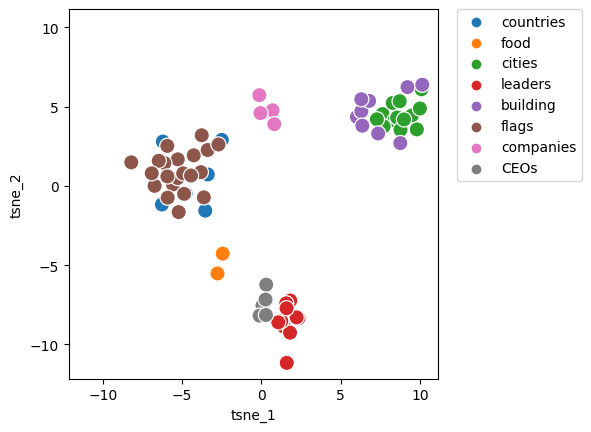

In [6]:
tsne = TSNE(n_components=2,  perplexity=20, n_iter=275, verbose=True, method='exact')
tsne_result = tsne.fit_transform(X)
tsne_result.shape

 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-1, tsne_result.max()+1)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)